# Main Aspect
The objective of this dataset is to understand:


*  Which programs or features attract the most interest and which ones may need improvement.
*  Which students are at risk of dropping out or disengaging.




In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pycountry-convert
import pycountry_convert as pc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 14.4 MB/s eta 0:00:00


# Importing Libraries

# Data Cleaning

In [2]:
df = pd.read_csv("/content/SLU Opportunity Wise Data-1710158595043 - SLU Opportunity Wise Data-1710158595043.csv")

In [3]:
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,01/12/2001,Female,Pakistan,Nwihs,Radiology,03/11/2024 12:01:41,Started,1080,06/14/2023 12:36:09,11/03/2022 18:30:39
1,05/01/2023 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,08/16/2000,Female,India,SAINT LOUIS,Information Systems,03/11/2024 12:01:41,Started,1080,05/01/2023 06:08:21,11/03/2022 18:30:39
2,04/09/2023 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,01/27/2002,Male,United States,Illinois Institute of Technology,Computer Science,03/11/2024 12:01:41,Started,1080,05/11/2023 1085640:21:29,11/03/2022 18:30:39
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,11/01/1999,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:01:41,Team Allocated,1070,10/09/2023 22:02:42,11/03/2022 18:30:39
4,01/06/2023 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,04/19/2000,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:01:41,Started,1080,01/06/2023 15:40:10,11/03/2022 18:30:39


In [4]:
df.shape

(8558, 16)

In [5]:
df.dtypes

,0
Learner SignUp DateTime,object
Opportunity Id,object
Opportunity Name,object
Opportunity Category,object
Opportunity End Date,object
First Name,object
Date of Birth,object
Gender,object
Country,object
Institution Name,object


In [6]:
df.isnull().sum()

,0
Learner SignUp DateTime,0
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,0
First Name,0
Date of Birth,0
Gender,0
Country,0
Institution Name,5


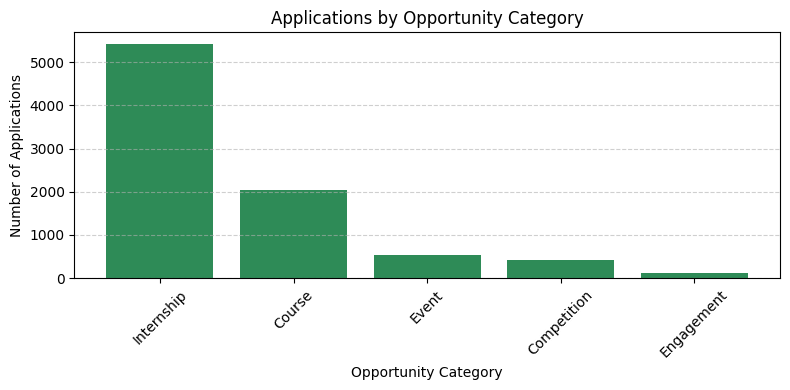

In [7]:
# Count number of applications per category
category_counts = df['Opportunity Category'].value_counts()

# Plotting

plt.figure(figsize=(8, 4))
plt.bar(category_counts.index, category_counts.values, color='SeaGreen')
plt.xlabel('Opportunity Category')
plt.ylabel('Number of Applications')
plt.title('Applications by Opportunity Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Fix date columns

In [8]:
date_cols = ['Learner SignUp DateTime', 'Opportunity End Date', 'Date of Birth',
             'Entry created at', 'Apply Date', 'Opportunity Start Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

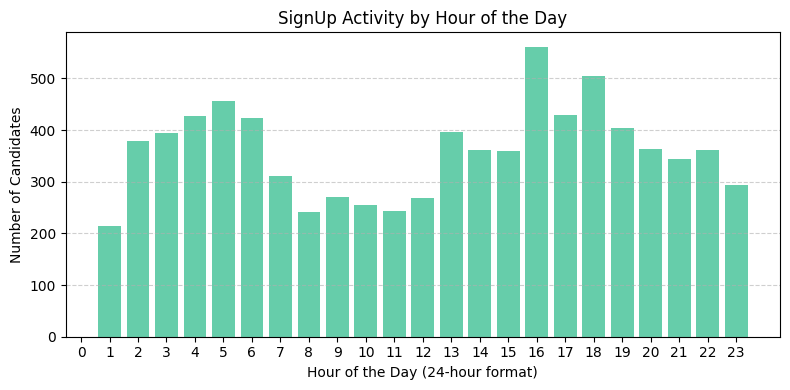

In [9]:
# Ensure Learner SignUp DateTime is datetime
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])

# Extract hour from datetime temporarily without adding a new column
hourly_counts = df['Learner SignUp DateTime'].dt.hour.value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(hourly_counts.index, hourly_counts.values, color='MediumAquamarine')
plt.xticks(range(24))
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Candidates')
plt.title('SignUp Activity by Hour of the Day')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

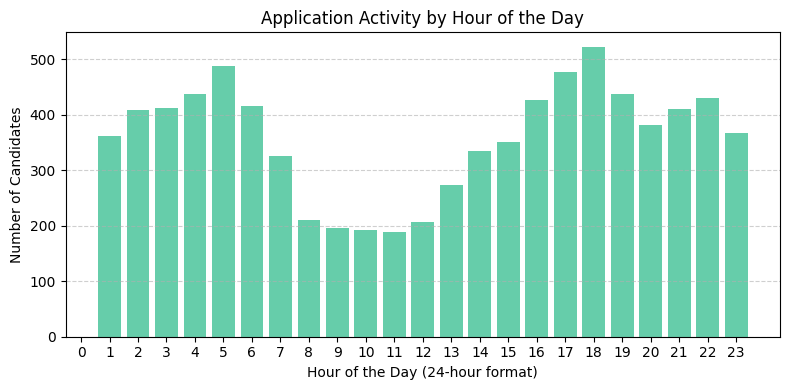

In [10]:
# Ensure 'Apply Date' is datetime
df['Apply Date'] = pd.to_datetime(df['Apply Date'])

# Count applications per hour (without creating a new column)
hourly_counts = df['Apply Date'].dt.hour.value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(hourly_counts.index, hourly_counts.values, color='MediumAquamarine')
plt.xticks(range(24))
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Candidates')
plt.title('Application Activity by Hour of the Day')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

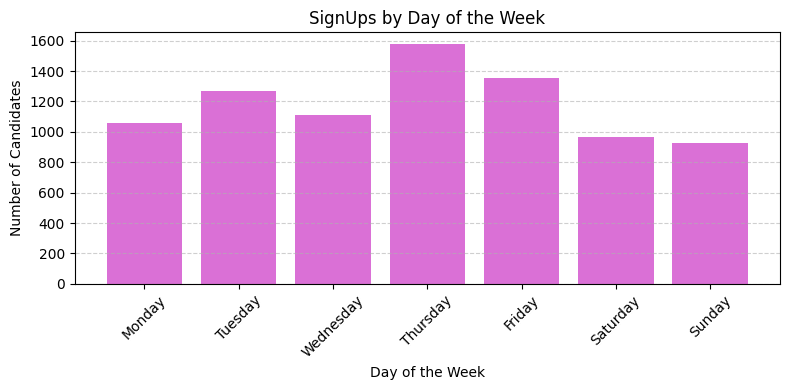

In [11]:
# Ensure datetime format
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])

# Count signUps per weekday without creating a new column
weekday_counts = df['Learner SignUp DateTime'].dt.day_name().value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(weekday_counts.index, weekday_counts.values, color='Orchid')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Candidates')
plt.title('SignUps by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

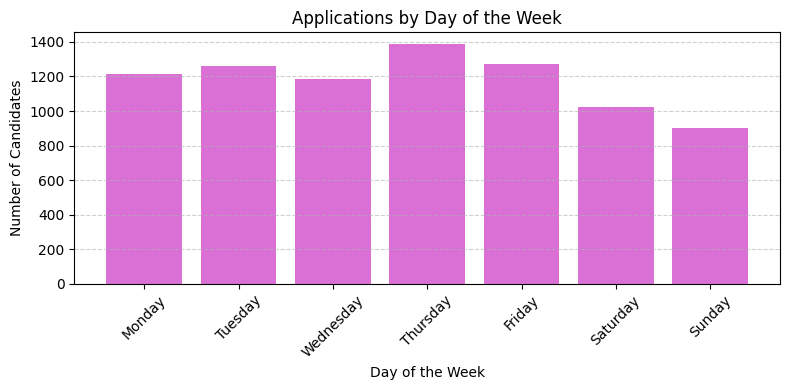

In [12]:
# Ensure 'Apply Date' is datetime
df['Apply Date'] = pd.to_datetime(df['Apply Date'])

# Count applications per weekday without creating a new column
weekday_counts = df['Apply Date'].dt.day_name().value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(weekday_counts.index, weekday_counts.values, color='orchid')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Candidates')
plt.title('Applications by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

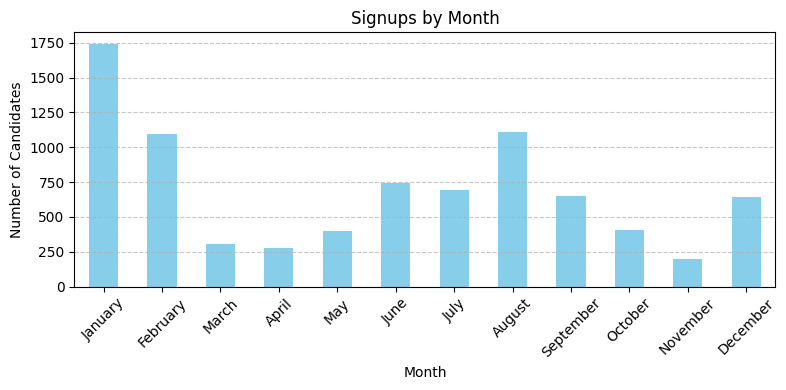

In [13]:
# Ensure datetime is parsed correctly
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])

# Count signups per month (without creating a new column)
signup_by_month = df['Learner SignUp DateTime'].dt.month_name().value_counts().sort_index(
    key=lambda x: pd.to_datetime(x, format='%B').month
)

# Plot
plt.figure(figsize=(8, 4))
signup_by_month.plot(kind='bar', color='skyblue')
plt.title('Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

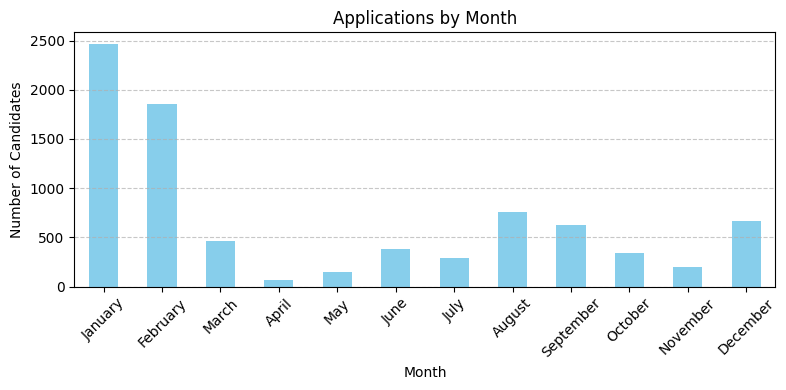

In [14]:
# Ensure datetime is parsed correctly
df['Apply Date'] = pd.to_datetime(df['Apply Date'])

# Count applications per month without creating a new column
apply_by_month = df['Apply Date'].dt.month_name().value_counts().sort_index(
    key=lambda x: pd.to_datetime(x, format='%B').month
)

# Plot
plt.figure(figsize=(8, 4))
apply_by_month.plot(kind='bar', color='skyblue')
plt.title('Applications by Month')
plt.xlabel('Month')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Gender

In [15]:
df['Gender'] = df['Gender'].str.strip().str.title()

## Removing any Duplicates

In [16]:
df.shape

(8558, 16)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(8558, 16)

In [19]:
df.isnull().sum()

,0
Learner SignUp DateTime,295
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,1262
First Name,0
Date of Birth,0
Gender,0
Country,0
Institution Name,5


## Handling Missing Values in Opportunity Start Date

In [20]:
print(df['Opportunity Start Date'].isnull().mean())  # Check % missing
print(df.groupby('Status Description')['Opportunity Start Date'].apply(lambda x: x.isnull().mean()))

0.5418322037859313
Status Description
Applied           1.000000
Dropped Out       0.508914
Rejected          1.000000
Rewards Award     0.000000
Started           0.000000
Team Allocated    0.155983
Waitlisted        1.000000
Withdraw          0.337209
Name: Opportunity Start Date, dtype: float64


Here:

*  For students who progressed into the program (Started, Rewards Award, Team Allocated), most have a valid Opportunity Start Date.
*   For students who didn't progress (Applied, Rejected, Waitlisted), the start date is completely missing — which makes sense! They never entered the program, so there was no start date to begin with.

Thus, the agenda of this dataset is to ensure that those who joined will continue thus it is expected that the one will enter the Opportunity Start Date. Thus it has no value on the dataset so it can be dropped.



In [21]:
df.drop(columns=['Opportunity Start Date'], inplace=True)

In [22]:
df.isnull().sum()

,0
Learner SignUp DateTime,295
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,1262
First Name,0
Date of Birth,0
Gender,0
Country,0
Institution Name,5


In [23]:
df.head(3)

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-01-12,Female,Pakistan,Nwihs,Radiology,2024-03-11 12:01:41,Started,1080,2023-06-14 12:36:09
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,SAINT LOUIS,Information Systems,2024-03-11 12:01:41,Started,1080,2023-05-01 06:08:21
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute of Technology,Computer Science,2024-03-11 12:01:41,Started,1080,NaT


## Handling Missing Values in Opportunity End Date

In [24]:
print(df['Opportunity End Date'].isnull().mean())  # Check % missing
print(df.groupby('Status Description')['Opportunity End Date'].apply(lambda x: x.isnull().mean()))

0.1474643608319701
Status Description
Applied           0.038095
Dropped Out       0.000000
Rejected          0.196133
Rewards Award     0.000000
Started           0.000000
Team Allocated    0.163919
Waitlisted        0.000000
Withdraw          0.244186
Name: Opportunity End Date, dtype: float64


Since the missing of opportunity end date is mostly in Rejected, Team Allocated and Withdraw which makes sence as one will have no end date if h/she is rejected or withdrawn from middle. Thus keeping it null makes sense.

Keep the missing values as they are (do NOT fill or drop blindly)
Instead, create a new binary feature to indicate whether the opportunity had an end date. This tells the model whether the candidate progressed far enough for an end date to be relevant.


*   1 means these is a value
*   0 means Null



In [25]:
df['has_opp_end_date'] = df['Opportunity End Date'].notna().astype(int)

## Handling Remaining Null Values

In [26]:
df.shape

(8558, 16)

In [27]:
df = df.dropna(subset=['Learner SignUp DateTime','Institution Name','Current/Intended Major','Apply Date'])

In [28]:
df.isnull().sum()

,0
Learner SignUp DateTime,0
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,1175
First Name,0
Date of Birth,0
Gender,0
Country,0
Institution Name,0


In [29]:
df.shape

(8014, 16)

# Feature Engineering

## Converting Date of Birth to Age

In [30]:
df['Age'] = (pd.to_datetime('today') - df['Date of Birth']).dt.days // 365

<ipython-input-30-2125545395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = (pd.to_datetime('today') - df['Date of Birth']).dt.days // 365


## Dropping Date of Birth

In [31]:
df.drop(columns=['Date of Birth'], inplace=True)

<ipython-input-31-585257967>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Date of Birth'], inplace=True)


In [32]:
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,has_opp_end_date,Age
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,Female,Pakistan,Nwihs,Radiology,2024-03-11 12:01:41,Started,1080,2023-06-14 12:36:09,1,24
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,Female,India,SAINT LOUIS,Information Systems,2024-03-11 12:01:41,Started,1080,2023-05-01 06:08:21,1,24
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,Female,United States,Saint Louis University,Information Systems,2024-03-11 12:01:41,Team Allocated,1070,2023-10-09 22:02:42,1,25
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,Male,United States,Saint Louis University,Computer Science,2024-03-11 12:01:41,Started,1080,2023-01-06 15:40:10,1,25
5,2024-03-02 19:16:07,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Mor,Male,India,Saint Louis University,Mechanical Engineering,2024-03-11 12:01:41,Waitlisted,1040,2024-03-02 20:30:35,1,29


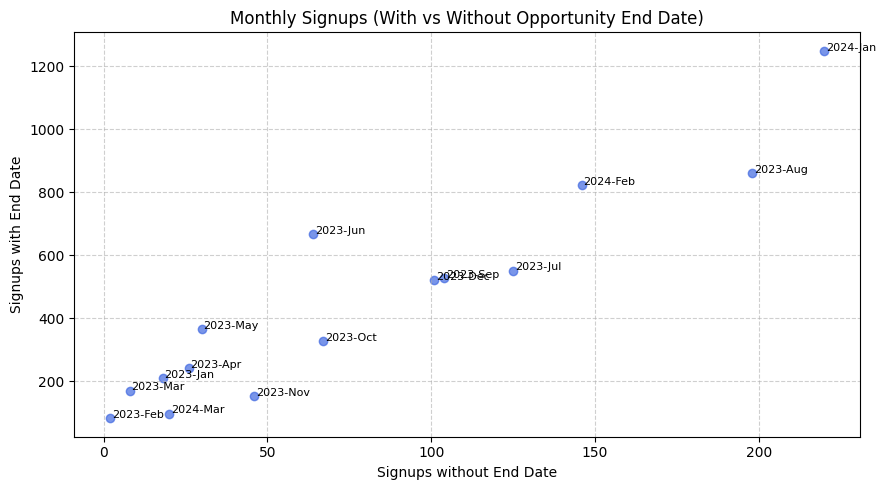

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a temporary copy for grouping
temp_df = df.copy()
temp_df['Signup Month'] = pd.to_datetime(temp_df['Learner SignUp DateTime']).dt.to_period('M')

# Aggregate by Signup Month and has_opp_end_date
monthly_agg = temp_df.groupby(['Signup Month', 'has_opp_end_date']).size().unstack(fill_value=0).reset_index()
monthly_agg['Signup Month'] = monthly_agg['Signup Month'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(9, 5))
plt.scatter(monthly_agg[0], monthly_agg[1], color='royalblue', alpha=0.7)

# Add labels with Year and Month
for i, row in monthly_agg.iterrows():
    label = row['Signup Month'].strftime('%Y-%b')
    plt.text(row[0] + 0.5, row[1] + 0.5, label, fontsize=8)

plt.xlabel('Signups without End Date')
plt.ylabel('Signups with End Date')
plt.title('Monthly Signups (With vs Without Opportunity End Date)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Dropping Uncecessary Features

*   Opportunity Id
*   First Name
*   Entry created at
*   Status Code

In [34]:
df.drop(columns=[
    'Opportunity Id',
    'First Name',
    'Entry created at',
    'Status Code'
], inplace=True)

In [35]:
df.head()

,Learner SignUp DateTime,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,Country,Institution Name,Current/Intended Major,Status Description,Apply Date,has_opp_end_date,Age
0,2023-06-14 12:30:35,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Female,Pakistan,Nwihs,Radiology,Started,2023-06-14 12:36:09,1,24
1,2023-05-01 05:29:16,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Female,India,SAINT LOUIS,Information Systems,Started,2023-05-01 06:08:21,1,24
3,2023-08-29 05:20:03,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Female,United States,Saint Louis University,Information Systems,Team Allocated,2023-10-09 22:02:42,1,25
4,2023-01-06 15:26:36,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Male,United States,Saint Louis University,Computer Science,Started,2023-01-06 15:40:10,1,25
5,2024-03-02 19:16:07,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Male,India,Saint Louis University,Mechanical Engineering,Waitlisted,2024-03-02 20:30:35,1,29


## Setting Status Description as Target Feature

In [36]:
# Show counts of each unique value in Status Description
print(df['Status Description'].value_counts())

Status Description
Rejected          3315
Team Allocated    3069
Started            740
Dropped Out        583
Applied            102
Waitlisted          92
Withdraw            84
Rewards Award       29
Name: count, dtype: int64


Since the main objective is to predict probability of disengagement or dropout of a candidate, Status Description can be set as a target Feature

Here, rows containing Rejected/Applied/Waitlisted are dropped out because:

*   Rejected: No action can be taken, not behavioral.
*   Applied / Waitlisted: No opportunity was actually started — may bias dropout prediction.

For target feature:

*   Dropped Out/ Withdraw are set as 1 i.e Disengaged or at risk.
*   Started/Team Allocated/ Rewards Award are set as 0 i.e Engaged or not risk.


In [37]:
df.shape

(8014, 12)

In [38]:
# Create binary target column
df['Target'] = df['Status Description'].apply(lambda x: 1 if x in ['Dropped Out', 'Withdraw']
                                              else (0 if x in ['Started', 'Team Allocated', 'Rewards Award']
                                              else np.nan))

# Drop rows where status is ambiguous (Rejected, Applied, Waitlisted)
df = df.dropna(subset=['Target'])

# Convert to integer
df['Target'] = df['Target'].astype(int)

<ipython-input-38-3269388488>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].astype(int)


In [39]:
df.sample(5)

,Learner SignUp DateTime,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,Country,Institution Name,Current/Intended Major,Status Description,Apply Date,has_opp_end_date,Age,Target
3937,2023-11-30 20:17:13,Project Management,Internship,2024-03-11 18:00:00,Female,United States,saint louis,Information Systems,Dropped Out,2024-01-05 19:37:53,1,27,1
2124,2023-08-21 18:07:22,Health Care Management,Internship,NaT,Female,India,Saint Louis University,Computer Science,Team Allocated,2023-08-29 16:50:07,0,22,0
1798,2023-01-05 16:33:15,Digital Marketing,Internship,2024-03-11 18:00:00,Male,United States,Saint Louis University,Information Systems,Dropped Out,2023-12-30 04:38:03,1,27,1
1323,2023-02-14 10:18:21,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Male,India,Sri Ramakrishna Engineering College,Computer Science and Engineering,Started,2023-02-17 09:35:35,1,22,0
6104,2024-01-03 21:28:35,Data Visualization Associate,Internship,2024-03-11 18:00:00,Male,United States,Saint Louis University,Artificial Intelligence,Team Allocated,2024-01-03 21:42:22,1,24,0


In [40]:
df.Target.value_counts()

,count
Target,
0,3838
1,667


In [41]:
# # Use Opportunity End Date as "completion" if Target is 1
# completion_dates = df[df['Target'] == 1]['Opportunity End Date'].dropna()
# completion_dates = pd.to_datetime(completion_dates)
# low_completion = completion_dates.value_counts().sort_index()
# plt.figure(figsize=(12, 4))
# low_completion.plot(kind='line', color='teal')
# plt.title('Completions Over Time')
# plt.ylabel('Number of Completions')
# plt.xlabel('Date')
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()
# threshold = low_completion.mean() * 0.5  # Define threshold for "low"
# low_days = low_completion[low_completion < threshold]
# print("Low completion days:\n", low_days)


In [42]:
df.shape

(4505, 13)

In [43]:
df.dtypes

,0
Learner SignUp DateTime,datetime64[ns]
Opportunity Name,object
Opportunity Category,object
Opportunity End Date,datetime64[ns]
Gender,object
Country,object
Institution Name,object
Current/Intended Major,object
Status Description,object
Apply Date,datetime64[ns]


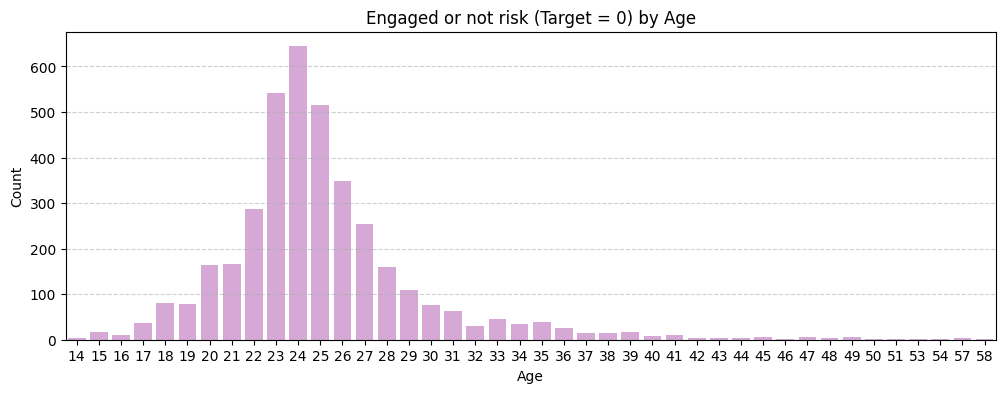

In [44]:
# Filter for only those who met the target
target_df = df[df['Target'] == 0]

# Count plot of Age Group for Target == 0
plt.figure(figsize=(12, 4))
sns.countplot(data=target_df, x='Age', order=target_df['Age'].value_counts().sort_index().index, color='plum')
plt.title('Engaged or not risk (Target = 0) by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

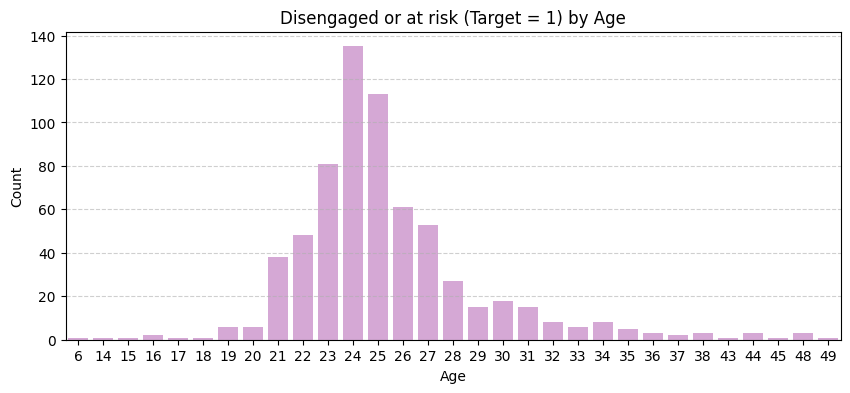

In [45]:
# Filter for only those who met the target
target_df = df[df['Target'] == 1]

# Count plot of Age Group for Target == 1
plt.figure(figsize=(10, 4))
sns.countplot(data=target_df, x='Age', order=target_df['Age'].value_counts().sort_index().index, color='plum')
plt.title('Disengaged or at risk (Target = 1) by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Adding duration of Apply Date to Opportunity End Date

In [46]:
df['Apply-Opportunity End Days'] = (df['Opportunity End Date'] - df['Apply Date']).dt.days

## Adding Time to Apply Hours

In [47]:
df['SignUp-Apply Days'] = (df['Apply Date'] - df['Learner SignUp DateTime']).dt.days

## Converting Data Types to ML Recognizable Form

| Column                   | Convert? | Why?                            |
| ------------------------ | -------- | ------------------------------- |
| `Opportunity Name`       | ✅ Yes    | Categorical text                |
| `Opportunity Category`   | ✅ Yes    | Categorical text                |
| `Gender`                 | ✅ Yes    | Only two values likely          |
| `Country`                | ✅ Yes    | Important feature               |
| `Institution Name`       | ✅ Yes    | May have high cardinality       |
| `Current/Intended Major` | ✅ Yes    | Categorical                     |
| `Status Description`     | ❌ No     | Already used to create `Target` |


Converting gender is simply done by using 0 and 1 but the other features containing objects can only be changed into integers by knowing which ML model is to be used for analysis. i.e.

| Your Goal                 | Recommendation                |
| ------------------------- | ----------------------------- |
| Tree models (XGBoost, RF) |  Group & LabelEncode |
| Logistic Regression / SVM |  One-Hot Encoding    |



### Gender




*   Male = 1
*   Female = 0


In [48]:
df.Gender.value_counts()

,count
Gender,
Male,2607
Female,1884
Don'T Want To Specify,13
Other,1


The entry count of "Don'T Want To Specify" and "Other" are nearly negligible thus it can simply be removed.

In [49]:
df = df[df['Gender'].isin(['Male', 'Female'])]
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}).astype(int)

<ipython-input-49-3630848740>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}).astype(int)


In [50]:
df.Gender.value_counts()

,count
Gender,
1,2607
0,1884


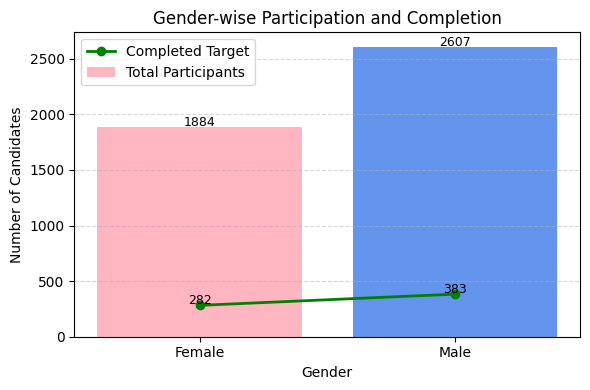

In [51]:

# Count total participants by gender
total_counts = df['Gender'].value_counts().sort_index()  # 0: Female, 1: Male

# Count participants with Target == 1 by gender
completed_counts = df[df['Target'] == 1]['Gender'].value_counts().sort_index()

# Gender labels
gender_labels = ['Female', 'Male']

# Plotting
plt.figure(figsize=(6, 4))

# Bar plot for total participants
bars = plt.bar(gender_labels, total_counts.values, color=['lightpink', 'cornflowerblue'], label='Total Participants')

# Line plot for completed targets
plt.plot(gender_labels, completed_counts.values, color='green', marker='o', linewidth=2, label='Completed Target')

# Add labels on bars
for i, val in enumerate(total_counts.values):
    plt.text(i, val + 10, str(val), ha='center', fontsize=9)

# Add labels on line points
for i, val in enumerate(completed_counts.values):
    plt.text(i, val + 10, str(val), ha='center', color='black', fontsize=9)

# Labels and formatting
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.title('Gender-wise Participation and Completion')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [52]:
df.shape

(4491, 15)

In [53]:
df.isnull().sum()

,0
Learner SignUp DateTime,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,522
Gender,0
Country,0
Institution Name,0
Current/Intended Major,0
Status Description,0
Apply Date,0


In [54]:
df.sample(5)

,Learner SignUp DateTime,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,Country,Institution Name,Current/Intended Major,Status Description,Apply Date,has_opp_end_date,Age,Target,Apply-Opportunity End Days,SignUp-Apply Days
1118,2023-08-08 19:36:05,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,0,United States,Saint Louis University,Epidemiology,Team Allocated,2023-09-01 11:31:05,1,35,0,302.0,23
2322,2023-07-21 18:29:16,Health Care Management,Internship,NaT,0,India,Sri Guru Tegh Bahadur Khalsa College Universi...,Zoology,Team Allocated,2023-07-21 18:45:20,0,23,0,NaN,0
7944,2024-01-10 03:16:57,UX Redesign Challenge,Competition,2024-04-19 18:29:00,0,United States,Saint Louis University,Information Systems,Team Allocated,2024-02-19 16:00:33,1,24,0,60.0,40
175,2023-06-29 17:28:18,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,1,United States,Saint Louis University,Computer Science,Started,2023-06-29 19:32:41,1,25,0,365.0,0
278,2023-11-29 17:27:49,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,0,United States,Saint Louis University I,Health Data Science,Team Allocated,2023-12-06 18:11:41,1,26,0,206.0,7


### Working on DateTime Features

In [55]:
df['signup_dayofweek'] = df['Learner SignUp DateTime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['signup_month'] = df['Learner SignUp DateTime'].dt.month
df['signup_hour'] = df['Learner SignUp DateTime'].dt.hour

In [56]:
df['apply_dayofweek'] = df['Apply Date'].dt.dayofweek
df['apply_month'] = df['Apply Date'].dt.month
df['apply_hour'] = df['Apply Date'].dt.hour

In [57]:
df.shape

(4491, 21)

In [58]:
df.sample(5)

,Learner SignUp DateTime,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,Country,Institution Name,Current/Intended Major,Status Description,Apply Date,...,Age,Target,Apply-Opportunity End Days,SignUp-Apply Days,signup_dayofweek,signup_month,signup_hour,apply_dayofweek,apply_month,apply_hour
2273,2023-09-13 06:21:56,Health Care Management,Internship,NaT,0,India,VNRVJIET,Computer Science and Engineering,Team Allocated,2023-09-13 07:20:29,...,22,0,NaN,0,2,9,6,2,9,7
8260,2024-01-13 06:46:48,Jump Start: Developing your Emotional Intellig...,Course,2025-12-24 03:34:00,0,United States,Saint Louis University,Health Data Science,Team Allocated,2024-02-09 18:49:42,...,25,0,683.0,27,5,1,6,4,2,18
185,2023-03-27 16:30:13,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,0,India,Banaras Hindu University,Psychology,Withdraw,2023-03-27 17:03:45,...,21,1,460.0,0,0,3,16,0,3,17
7936,2024-03-01 23:46:32,UX Redesign Challenge,Competition,2024-04-19 18:29:00,1,United States,Saint Louis university,Computer Science,Team Allocated,2024-03-08 01:58:53,...,25,0,42.0,6,4,3,23,4,3,1
270,2023-05-28 14:47:57,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,0,Pakistan,Institute of Professional Psychology Bahria U...,Psychology,Started,2023-06-04 19:23:19,...,23,0,390.0,7,6,5,14,6,6,19


## Dropping Unnecessary Features

In [59]:
df.columns

Index(['Learner SignUp DateTime', 'Opportunity Name', 'Opportunity Category',
       'Opportunity End Date', 'Gender', 'Country', 'Institution Name',
       'Current/Intended Major', 'Status Description', 'Apply Date',
       'has_opp_end_date', 'Age', 'Target', 'Apply-Opportunity End Days',
       'SignUp-Apply Days', 'signup_dayofweek', 'signup_month', 'signup_hour',
       'apply_dayofweek', 'apply_month', 'apply_hour'],
      dtype='object')

In [60]:
df.drop(columns=[
    'Learner SignUp DateTime',
    'Opportunity End Date',
    'Apply Date',
], inplace=True)

In [61]:
df.sample(5)

,Opportunity Name,Opportunity Category,Gender,Country,Institution Name,Current/Intended Major,Status Description,has_opp_end_date,Age,Target,Apply-Opportunity End Days,SignUp-Apply Days,signup_dayofweek,signup_month,signup_hour,apply_dayofweek,apply_month,apply_hour
7169,Project Management Associate,Internship,1,India,SRM UNIVERSITY,Electronics and Communication,Team Allocated,0,24,0,NaN,367,3,1,16,0,1,15
5679,Startup Mastery Workshop,Event,0,United States,saint louis university,Cyber Security,Team Allocated,1,24,0,27.0,0,5,1,20,5,1,21
787,Career Essentials: Getting Started with Your P...,Course,0,Ghana,Liverpool John Moores University,Public Health,Team Allocated,1,33,0,312.0,46,4,7,7,1,8,18
240,Career Essentials: Getting Started with Your P...,Course,1,Nigeria,Federal university oye ekiti.,Economics,Started,1,26,0,377.0,2,4,6,10,6,6,10
796,Career Essentials: Getting Started with Your P...,Course,0,India,TSS,Project Management,Started,1,20,0,458.0,0,2,3,2,2,3,3


## One Hot Encoding

### Opportunity Name

In [62]:
df['Opportunity Name'].unique()

array(['Career Essentials: Getting Started with Your Professional Journey',
       'Slide Geeks: A Presentation Design Competition',
       'Digital Marketing', 'Health Care Management',
       'Innovation & Entrepreneurship', 'Project Management',
       'Data Visualization', 'CPR/AED Certification',
       'Mental and Physical Health Session',
       'Jump Start: Developing your Emotional Intelligence',
       'Join a Student Organisation', 'Upload Your First Year Transcript',
       'Startup Mastery Workshop', 'Data Visualization Associate',
       'Digital Strategy Virtual Internship',
       'Project Management Associate', 'Business Consulting',
       'UrbanRenew Challenge', 'UX Redesign Challenge',
       'Xperience Design Hackathon', 'Freelance Mastery workshop'],
      dtype=object)

In [63]:
df['Opportunity Name'].value_counts()

,count
Opportunity Name,
Career Essentials: Getting Started with Your Professional Journey,1290
Health Care Management,422
Data Visualization,337
CPR/AED Certification,318
Project Management,275
Startup Mastery Workshop,247
Freelance Mastery workshop,204
Jump Start: Developing your Emotional Intelligence,202
Digital Marketing,179


In [64]:
# One-hot encode 'Opportunity Name'
df = pd.get_dummies(df, columns=['Opportunity Name'], prefix='Opp')

# Convert only the newly created dummy columns to int
dummy_cols = [col for col in df.columns if col.startswith('Opp_')]
df[dummy_cols] = df[dummy_cols].fillna(0).astype(int)

In [65]:
df.sample(5)

,Opportunity Category,Gender,Country,Institution Name,Current/Intended Major,Status Description,has_opp_end_date,Age,Target,Apply-Opportunity End Days,...,Opp_Jump Start: Developing your Emotional Intelligence,Opp_Mental and Physical Health Session,Opp_Project Management,Opp_Project Management Associate,Opp_Slide Geeks: A Presentation Design Competition,Opp_Startup Mastery Workshop,Opp_UX Redesign Challenge,Opp_Upload Your First Year Transcript,Opp_UrbanRenew Challenge,Opp_Xperience Design Hackathon
3993,Internship,1,United States,Saint Louis University,Computer Science and Information Systems,Dropped Out,1,25,1,60.0,...,0,0,1,0,0,0,0,0,0,0
7518,Internship,0,India,Saint Louis University,Information Systems,Team Allocated,1,25,0,62.0,...,0,0,0,0,0,0,0,0,0,0
1638,Internship,1,India,Saint Louis University,Information Systems,Dropped Out,1,25,1,85.0,...,0,0,0,0,0,0,0,0,0,0
869,Course,1,United States,Saint Louis University,Cyber Security,Team Allocated,1,25,0,142.0,...,0,0,0,0,0,0,0,0,0,0
344,Course,0,India,Vicon School,Aerospace Engineering,Started,1,18,0,360.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df.shape

(4491, 38)

### Opportunity Category

In [67]:
df['Opportunity Category'].unique()

array(['Course', 'Competition', 'Internship', 'Event', 'Engagement'],
      dtype=object)

In [68]:
# One-hot encode the 'Opportunity Category' column
df = pd.get_dummies(df, columns=['Opportunity Category'], prefix='OppCat')

# Convert only the new dummy columns to integer (0/1)
dummy_cols = [col for col in df.columns if col.startswith('OppCat_')]
df[dummy_cols] = df[dummy_cols].astype(int)

In [69]:
df.sample(5)

,Gender,Country,Institution Name,Current/Intended Major,Status Description,has_opp_end_date,Age,Target,Apply-Opportunity End Days,SignUp-Apply Days,...,Opp_Startup Mastery Workshop,Opp_UX Redesign Challenge,Opp_Upload Your First Year Transcript,Opp_UrbanRenew Challenge,Opp_Xperience Design Hackathon,OppCat_Competition,OppCat_Course,OppCat_Engagement,OppCat_Event,OppCat_Internship
8411,0,United States,University of Hawaii at Manoa,Education Administration,Team Allocated,1,58,0,14.0,0,...,0,0,0,0,0,0,0,0,1,0
7829,0,United States,Saint Louis University,Information Systems,Team Allocated,1,26,0,49.0,51,...,0,0,0,1,0,1,0,0,0,0
4828,1,United States,saint louis unveracity,Project Management,Dropped Out,1,28,1,82.0,5,...,0,0,0,0,0,0,0,0,0,1
6671,1,United States,Saint Louis University,Information Systems,Team Allocated,1,25,0,66.0,0,...,0,0,0,0,0,0,0,0,0,1
5740,1,United States,saint louis university,Cyber Security,Team Allocated,1,23,0,48.0,0,...,1,0,0,0,0,0,0,0,1,0


In [70]:
df.shape

(4491, 42)

### Country

In [71]:
df['Country'].unique()

array(['Pakistan', 'India', 'United States', 'United Arab Emirates',
       'Nigeria', 'Egypt', 'Nepal', 'Kenya', 'Ghana', 'Zambia', 'Morocco',
       'Ethiopia', 'Zimbabwe', 'Uganda', 'Indonesia', 'Cameroon', 'China',
       'Bangladesh', 'Congo', 'Liberia', 'United Kingdom', 'Vietnam',
       'Japan', 'Rwanda', 'Gambia', 'Philippines', 'Australia', 'Somalia',
       'Sierra Leone', 'Lebanon', 'Botswana', 'Iraq', 'Uzbekistan',
       'Turkey', 'Honduras', 'Tanzania, United Republic of Tanzania',
       'France', 'Belarus', 'Algeria', 'Mauritius', 'Tunisia',
       'Kazakhstan', 'Peru', 'Brazil', 'Ukraine', 'South Africa',
       'Germany', 'Namibia', 'Iran, Islamic Republic of Persian Gulf',
       'Korea, Republic of South Korea', 'American Samoa',
       'Falkland Islands (Malvinas)', 'Saudi Arabia', 'Azerbaijan',
       'Dominican Republic', 'Lesotho', 'British Indian Ocean Territory',
       'Virgin Islands, U.S.', 'Qatar', 'Singapore', "Cote d'Ivoire",
       'Afghanistan', 'Iran

In [72]:
def country_to_subcontinent(country_name):
    try:
        # Handle special cases not covered by the library
        if country_name == "Cote d'Ivoire":
            country_name = "Ivory Coast"
        elif "Iran" in country_name:
            country_name = "Iran"
        elif "Korea" in country_name:
            country_name = "South Korea"
        elif "Tanzania" in country_name:
            country_name = "Tanzania"
        elif "United States" in country_name:
            country_name = "United States"
        elif "Russia" in country_name:
            country_name = "Russia"
        elif "Vietnam" in country_name:
            country_name = "Vietnam"

        # Get the ISO alpha-2 country code
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")

        # Get the continent code from country code
        continent_code = pc.country_alpha2_to_continent_code(country_code)

        # Map continent codes to names
        continent_map = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'OC': 'Oceania',
            'SA': 'South America',
            'AN': 'Antarctica'
        }
        return continent_map.get(continent_code, 'Other')

    except Exception as e:
        return 'Other'

# Apply the function to your Country column
df['Subcontinent'] = df['Country'].apply(country_to_subcontinent)

In [73]:
df.sample(5)

,Gender,Country,Institution Name,Current/Intended Major,Status Description,has_opp_end_date,Age,Target,Apply-Opportunity End Days,SignUp-Apply Days,...,Opp_UX Redesign Challenge,Opp_Upload Your First Year Transcript,Opp_UrbanRenew Challenge,Opp_Xperience Design Hackathon,OppCat_Competition,OppCat_Course,OppCat_Engagement,OppCat_Event,OppCat_Internship,Subcontinent
5822,1,India,Mangalore University,Commerce,Team Allocated,1,23,0,9.0,0,...,0,0,0,0,0,0,0,1,0,Asia
8524,1,United States,Saint Louis university,Computer Science,Team Allocated,1,24,0,0.0,0,...,0,0,0,0,0,0,0,1,0,North America
3849,1,Nigeria,University of Jos,Film Making,Team Allocated,1,40,0,208.0,0,...,0,0,0,0,0,0,0,0,1,Africa
3307,1,India,University of Delhi,Arts,Dropped Out,1,28,1,202.0,0,...,0,0,0,0,0,0,0,0,1,Asia
6506,0,India,Vellore Institute of Technology,Computer Science,Team Allocated,1,22,0,63.0,0,...,0,0,0,0,0,0,0,0,1,Asia


In [74]:
df['Subcontinent'].unique()

array(['Asia', 'North America', 'Africa', 'Europe', 'Oceania',
       'South America'], dtype=object)

In [75]:
df['Subcontinent'].value_counts()

,count
Subcontinent,
Asia,1870
North America,1783
Africa,804
Europe,23
Oceania,6
South America,5


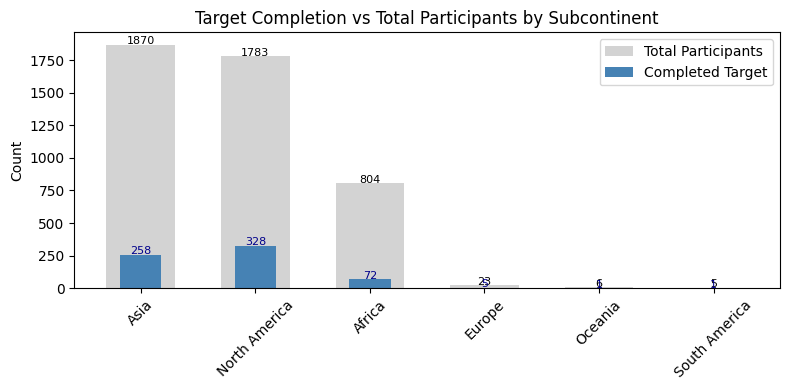

In [76]:
# Group data by subcontinent
continent_target = df.groupby('Subcontinent').agg(
    total_participants=('Target', 'count'),
    completed_target=('Target', 'sum')
).reset_index()

# Sort by total participants for consistent order
continent_target = continent_target.sort_values(by='total_participants', ascending=False)

# Plotting with smaller figure size
plt.figure(figsize=(8, 4))  # Reduced size
bar_width = 0.6
x = np.arange(len(continent_target))

# Background bars - Total participants
plt.bar(
    x,
    continent_target['total_participants'],
    width=bar_width,
    color='lightgrey',
    label='Total Participants'
)

# Foreground bars - Completed target
plt.bar(
    x,
    continent_target['completed_target'],
    width=bar_width * 0.6,
    color='steelblue',
    label='Completed Target'
)

# Adding numbers on top of the bars
for i in range(len(continent_target)):
    # Total participants
    plt.text(
        x[i],
        continent_target['total_participants'].iloc[i] + 1,
        str(continent_target['total_participants'].iloc[i]),
        ha='center',
        color='black',
        fontsize=8
    )
    # Completed target
    plt.text(
        x[i],
        continent_target['completed_target'].iloc[i] + 1,
        str(continent_target['completed_target'].iloc[i]),
        ha='center',
        color='darkblue',
        fontsize=8
    )

# Labels and formatting
plt.xticks(x, continent_target['Subcontinent'], rotation=45)
plt.ylabel('Count')
plt.title('Target Completion vs Total Participants by Subcontinent', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
df.drop(columns=['Country'], inplace=True)

In [78]:
# One-hot encode the 'Subcontinent' column
df = pd.get_dummies(df, columns=['Subcontinent'], prefix='Subcont')

# Convert only the new dummy columns to integer (0/1)
dummy_cols = [col for col in df.columns if col.startswith('Subcont_')]
df[dummy_cols] = df[dummy_cols].astype(int)

In [79]:
df.sample(5)

,Gender,Institution Name,Current/Intended Major,Status Description,has_opp_end_date,Age,Target,Apply-Opportunity End Days,SignUp-Apply Days,signup_dayofweek,...,OppCat_Course,OppCat_Engagement,OppCat_Event,OppCat_Internship,Subcont_Africa,Subcont_Asia,Subcont_Europe,Subcont_North America,Subcont_Oceania,Subcont_South America
3938,0,SAINT LOUIS UNIVERSITY,Computer Information Systems,Dropped Out,1,24,1,89.0,0,1,...,0,0,0,1,0,0,0,1,0,0
4297,1,Sri venkateswara college of engineering,Information Systems,Team Allocated,1,24,0,145.0,143,5,...,0,0,0,1,0,1,0,0,0,0
1615,1,Wildlife Clubs of Kenya,Ot,Team Allocated,1,33,0,60.0,0,2,...,0,0,0,1,1,0,0,0,0,0
1096,1,Saint Louis University,Data Analytics,Team Allocated,1,24,0,308.0,0,4,...,1,0,0,0,0,0,0,1,0,0
7882,1,Saint Louis University,Information Systems,Team Allocated,1,22,0,67.0,63,2,...,0,0,0,0,0,0,0,1,0,0


In [80]:
df.shape

(4491, 47)

### Institution Name

In [81]:
df['Institution Name'].value_counts()

,count
Institution Name,
Saint Louis University,1234
saint louis university,355
Saint louis university,105
Saint Louis university,89
Saint louis University,61
...,...
Lautech,1
Nelson Mandela University,1
V. K. R V. N. B & A. G. K College of Engineering,1


In [82]:
df.drop(columns=[
    'Institution Name'
], inplace=True)

In [83]:
df.sample(5)

,Gender,Current/Intended Major,Status Description,has_opp_end_date,Age,Target,Apply-Opportunity End Days,SignUp-Apply Days,signup_dayofweek,signup_month,...,OppCat_Course,OppCat_Engagement,OppCat_Event,OppCat_Internship,Subcont_Africa,Subcont_Asia,Subcont_Europe,Subcont_North America,Subcont_Oceania,Subcont_South America
10,0,Data Visualization,Team Allocated,1,26,0,298.0,0,0,9,...,1,0,0,0,1,0,0,0,0,0
5558,1,Cyber Security,Team Allocated,1,23,0,673.0,161,2,8,...,0,1,0,0,0,0,0,1,0,0
5729,1,Information Systems,Team Allocated,1,23,0,123.0,56,0,8,...,0,0,1,0,0,1,0,0,0,0
7852,0,Computer Science,Team Allocated,1,24,0,80.0,183,3,8,...,0,0,0,0,0,1,0,0,0,0
5011,0,Communication and Media Studies,Team Allocated,1,19,0,353.0,0,3,7,...,1,0,0,0,0,0,0,1,0,0


### Current/Intended Major (Remaining)

In [84]:
df['Current/Intended Major'].unique()

array(['Radiology', 'Information Systems', 'Computer Science',
       'Computer Science and Engineering', 'Artificial Intelligence',
       'Robotics and Automation Engineering', 'Data Visualization',
       'Business Administration', 'Public Health', 'Architecture',
       'Computer Science and Information Systems', 'Biology', 'Economics',
       'Oth', 'Mathematics', 'Bioinformatics', 'I Am Major',
       'Biomedical Engineering', 'Electrical and Electronic Engineering',
       'Business and Management Studies',
       'Electrical and Computer Engineering', 'Accounting and Finance',
       'Secretarial', 'Data Science', 'Statistics',
       'Electronics and Communication', 'Computer Information Systems',
       'Management Information Systems', 'Other', 'Project Management',
       'Medicine', 'Information', 'Actuarial Mathematics',
       'Mechanical Engineering', 'Software Engineering',
       'Biological Sciences', 'Urban and Housing Development',
       'Human Resources', 'Cyber 

In [85]:
df['Current/Intended Major'].value_counts()

,count
Current/Intended Major,
Information Systems,920
Computer Science,568
Cyber Security,176
Health Data Science,165
Computer Science and Information Systems,133
...,...
Multimedia Communication,1
Physical Therapy,1
Geographic Information Science,1


In [86]:
# Define keywords commonly found in STEM fields
stem_keywords = [
    'science', 'engineering', 'computer', 'technology', 'informatics',
    'systems', 'mathematics', 'statistics', 'cyber', 'robotics', 'physics',
    'bioinformatics', 'actuarial', 'data', 'mechanical', 'electrical',
    'civil', 'software', 'environmental', 'aerospace', 'information',
    'biomedical', 'automation', 'geology', 'electronics'
]

# Get unique majors from the dataset
majors = df['Current/Intended Major'].dropna().unique()

# Classify as STEM (1) if any keyword is found in the major string (case-insensitive)
stem_classification = {
    major: int(any(keyword in major.lower() for keyword in stem_keywords))
    for major in majors
}

# Add STEM column to the original DataFrame
df['STEM'] = df['Current/Intended Major'].map(stem_classification).fillna(0).astype(int)

# Optional: View counts of STEM vs non-STEM
print(df['STEM'].value_counts())

STEM
1    3174
0    1317
Name: count, dtype: int64


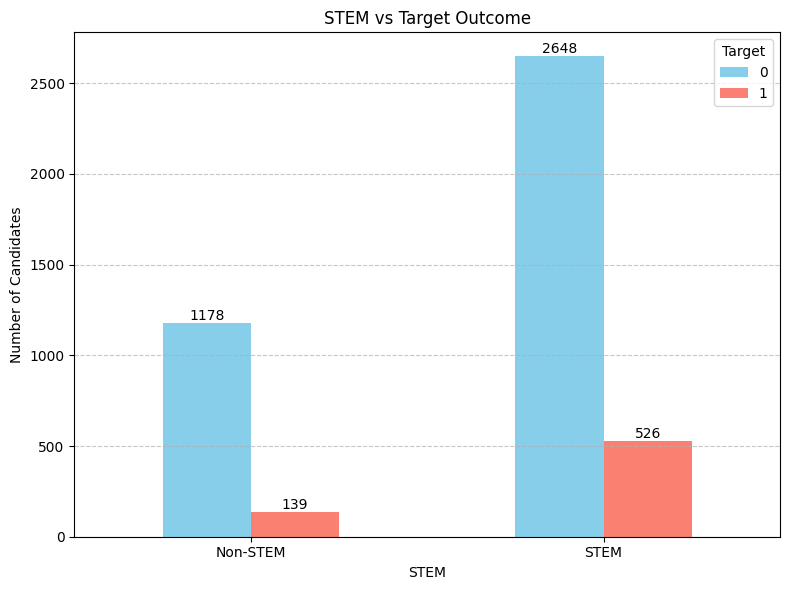

In [87]:
# Group and count by STEM and Target
stem_target_counts = df.groupby(['STEM', 'Target']).size().unstack(fill_value=0)

# Plot grouped bar chart
ax = stem_target_counts.plot(kind='bar', stacked=False, figsize=(8, 6), color=['skyblue', 'salmon'])

# Customize plot
plt.title('STEM vs Target Outcome')
plt.xlabel('STEM')
plt.ylabel('Number of Candidates')
plt.legend(title='Target')
plt.xticks([0, 1], ['Non-STEM', 'STEM'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add value labels on bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Show plot
plt.show()


In [88]:
df.drop(columns=[
  'Current/Intended Major'
], inplace=True)

### Status Description

In [89]:
df['Status Description'].unique()

array(['Started', 'Team Allocated', 'Withdraw', 'Rewards Award',
       'Dropped Out'], dtype=object)

In [90]:
df.drop(columns=[
  'Status Description'
], inplace=True)

In [91]:
df.sample(5)

,Gender,has_opp_end_date,Age,Target,Apply-Opportunity End Days,SignUp-Apply Days,signup_dayofweek,signup_month,signup_hour,apply_dayofweek,...,OppCat_Engagement,OppCat_Event,OppCat_Internship,Subcont_Africa,Subcont_Asia,Subcont_Europe,Subcont_North America,Subcont_Oceania,Subcont_South America,STEM
8545,1,1,26,0,8.0,0,2,2,17,2,...,0,1,0,1,0,0,0,0,0,0
3990,0,1,26,0,81.0,2,1,12,3,3,...,0,0,1,0,0,0,1,0,0,0
2657,1,0,27,0,NaN,188,4,6,12,3,...,0,0,1,0,0,0,1,0,0,0
106,1,1,21,0,326.0,0,1,8,17,1,...,0,0,0,1,0,0,0,0,0,1
7939,1,1,23,0,73.0,298,3,4,17,1,...,0,0,0,0,1,0,0,0,0,1


In [92]:
df.shape

(4491, 45)

In [93]:
df.columns

Index(['Gender', 'has_opp_end_date', 'Age', 'Target',
       'Apply-Opportunity End Days', 'SignUp-Apply Days', 'signup_dayofweek',
       'signup_month', 'signup_hour', 'apply_dayofweek', 'apply_month',
       'apply_hour', 'Opp_Business Consulting', 'Opp_CPR/AED Certification',
       'Opp_Career Essentials: Getting Started with Your Professional Journey',
       'Opp_Data Visualization', 'Opp_Data Visualization Associate',
       'Opp_Digital Marketing', 'Opp_Digital Strategy Virtual Internship',
       'Opp_Freelance Mastery workshop', 'Opp_Health Care Management',
       'Opp_Innovation & Entrepreneurship', 'Opp_Join a Student Organisation',
       'Opp_Jump Start: Developing your Emotional Intelligence',
       'Opp_Mental and Physical Health Session', 'Opp_Project Management',
       'Opp_Project Management Associate',
       'Opp_Slide Geeks: A Presentation Design Competition',
       'Opp_Startup Mastery Workshop', 'Opp_UX Redesign Challenge',
       'Opp_Upload Your First Yea

In [94]:
df.isnull().sum()

,0
Gender,0
has_opp_end_date,0
Age,0
Target,0
Apply-Opportunity End Days,522
SignUp-Apply Days,0
signup_dayofweek,0
signup_month,0
signup_hour,0
apply_dayofweek,0


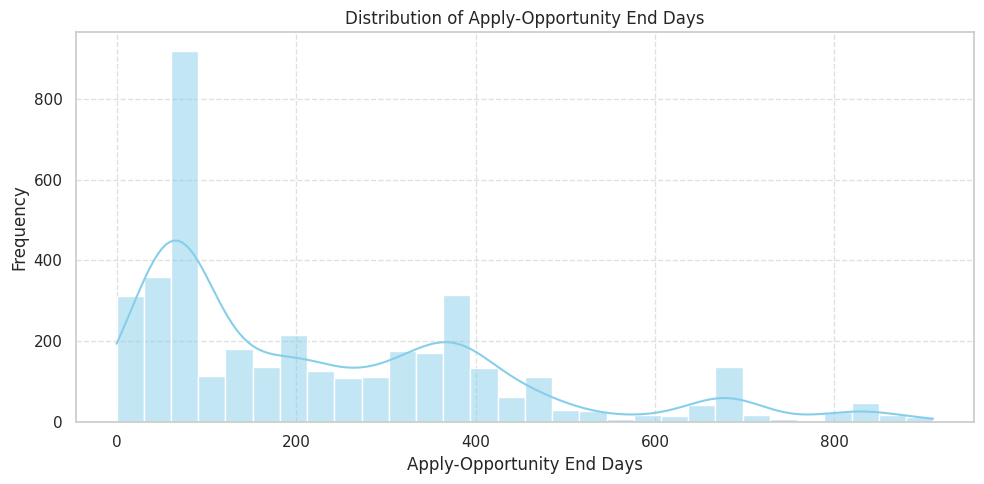


Number of null values: 522


In [95]:
# Set style
sns.set(style='whitegrid')

# Plot the distribution of non-null values
plt.figure(figsize=(10, 5))
sns.histplot(df['Apply-Opportunity End Days'].dropna(), bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Apply-Opportunity End Days')
plt.xlabel('Apply-Opportunity End Days')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Show count of null values
null_count = df['Apply-Opportunity End Days'].isnull().sum()
print(f"\nNumber of null values: {null_count}")

In [96]:
median_value = df['Apply-Opportunity End Days'].median()
df['Apply-Opportunity End Days'].fillna(median_value, inplace=True)

<ipython-input-96-520060839>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Apply-Opportunity End Days'].fillna(median_value, inplace=True)


In [97]:
df.isnull().sum()

,0
Gender,0
has_opp_end_date,0
Age,0
Target,0
Apply-Opportunity End Days,0
SignUp-Apply Days,0
signup_dayofweek,0
signup_month,0
signup_hour,0
apply_dayofweek,0


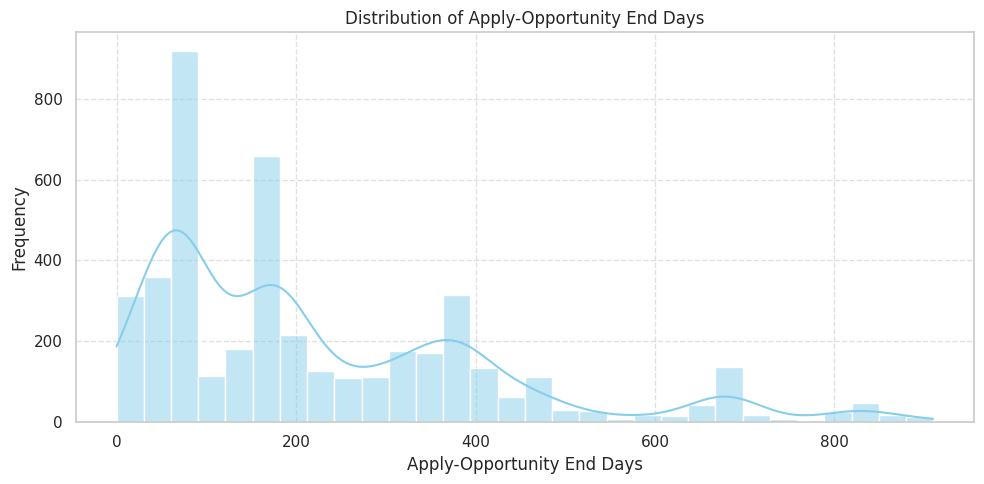


Number of null values: 0


In [98]:
# Set style
sns.set(style='whitegrid')

# Plot the distribution of non-null values
plt.figure(figsize=(10, 5))
sns.histplot(df['Apply-Opportunity End Days'].dropna(), bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Apply-Opportunity End Days')
plt.xlabel('Apply-Opportunity End Days')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Show count of null values
null_count = df['Apply-Opportunity End Days'].isnull().sum()
print(f"\nNumber of null values: {null_count}")

# Normalization

In [99]:
from sklearn.preprocessing import StandardScaler

# Example: normalize age, apply hour, signup hour, etc.
scaler = StandardScaler()
df[['Age','Apply-Opportunity End Days', 'SignUp-Apply Days', 'signup_dayofweek','signup_month', 'signup_hour', 'apply_dayofweek', 'apply_month',
'apply_hour']] = scaler.fit_transform(df[['Age',
       'Apply-Opportunity End Days', 'SignUp-Apply Days', 'signup_dayofweek',
       'signup_month', 'signup_hour', 'apply_dayofweek', 'apply_month',
       'apply_hour']])

In [100]:
df.sample(5)

,Gender,has_opp_end_date,Age,Target,Apply-Opportunity End Days,SignUp-Apply Days,signup_dayofweek,signup_month,signup_hour,apply_dayofweek,...,OppCat_Engagement,OppCat_Event,OppCat_Internship,Subcont_Africa,Subcont_Asia,Subcont_Europe,Subcont_North America,Subcont_Oceania,Subcont_South America,STEM
1195,0,1,-0.024045,0,0.134518,0.050832,1.644121,0.559116,0.888069,-0.468432,...,0,0,0,0,0,0,1,0,0,1
6924,1,0,0.413146,0,-0.279290,0.920033,0.568087,0.559116,-0.361111,1.113318,...,0,0,1,0,1,0,0,0,0,1
1697,0,1,-0.461235,0,-0.877012,-0.621350,1.644121,-1.451055,0.107332,1.640568,...,0,0,1,0,1,0,0,0,0,1
1142,1,1,0.631741,0,0.446150,-0.609761,-0.507948,0.559116,1.200364,0.586068,...,0,0,0,0,1,0,0,0,0,1
8290,1,1,-0.898426,0,2.280186,-0.621350,1.106104,-1.163888,1.512659,1.113318,...,0,0,0,0,0,0,1,0,0,1


In [101]:
df.shape

(4491, 45)

# Model Training

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Applying SMOTE
SMOTE (Synthetic Minority Oversampling Technique) is a powerful way to balance classes by generating synthetic samples for the minority class.

In [103]:
# Step 1: Import the necessary library
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 2: Split your data into features (X) and target (y)
X = df.drop('Target', axis=1)  # replace 'target' with your actual target column name
y = df['Target']

# Step 3: Train-test split (recommended before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled  = smote.fit_resample(X_train, y_train)

# Step 5: Check the new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 3060, 1: 532})
After SMOTE: Counter({0: 3060, 1: 3060})


## Confusion Matrix:
*   1 = Positive (e.g., student dropped out)
*   0 = Negative (e.g., student continued)

|               | **Predicted: 0**    | **Predicted: 1**    |
| ------------- | ------------------- | ------------------- |
| **Actual: 0** | True Negative (TN)  | False Positive (FP) |
| **Actual: 1** | False Negative (FN) | True Positive (TP)  |



## Interpretation Of Matrices
| Metric        | Explanation                                                                                            |
| ------------- | ------------------------------------------------------------------------------------------------------ |
| **Precision** | Of all students the model predicted to drop out, how many actually did? *(TP / (TP + FP))*             |
| **Recall**    | Of all students who actually dropped out, how many did the model correctly predict? *(TP / (TP + FN))* |
| **F1-score**  | Harmonic mean of precision and recall. Good balance measure.                                           |
| **Support**   | Number of actual samples in each class.                                                                |


## Logistic Regression

In [104]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [105]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probability of target=1

In [106]:
# Evaluate the model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       766
           1       0.66      0.88      0.76       133

    accuracy                           0.92       899
   macro avg       0.82      0.90      0.85       899
weighted avg       0.93      0.92      0.92       899



In [107]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[707  59]
 [ 16 117]]


## Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [110]:
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       766
           1       0.73      0.77      0.75       133

    accuracy                           0.92       899
   macro avg       0.85      0.86      0.85       899
weighted avg       0.93      0.92      0.93       899



In [111]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[729  37]
 [ 31 102]]


## Random Forest

In [112]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [113]:
# Make predictions
y_pred = model.predict(X_test)

In [114]:
# Evaluate the model
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       766
           1       0.74      0.83      0.78       133

    accuracy                           0.93       899
   macro avg       0.86      0.89      0.87       899
weighted avg       0.94      0.93      0.93       899



In [115]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[728  38]
 [ 23 110]]


## XG Boost

In [116]:
from xgboost import XGBClassifier

In [117]:
model = XGBClassifier(random_state=42,objective='binary:logistic')
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [118]:
# Make predictions
y_pred = model.predict(X_test)

In [119]:
# Evaluate the model
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       766
           1       0.78      0.81      0.79       133

    accuracy                           0.94       899
   macro avg       0.87      0.89      0.88       899
weighted avg       0.94      0.94      0.94       899



In [120]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[735  31]
 [ 25 108]]
